# Explore here

In [1]:
# Your code here
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd
import requests
import matplotlib.pyplot as plt

resource_url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"

response = requests.get(resource_url)

if response.status_code == 200:
    print("¡Petición exitosa! Código:", response.status_code)
    with open("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv", "w", encoding="utf-8") as dataset:
        dataset.write(response.text)
else:
    print("Error al descargar el archivo. Código de estado:", response.status_code)

ds=pd.read_csv("/workspaces/Finarosalina_Regresion_lineal_EDA_insurance/data/raw/medical_insurance_cost.csv")

ds.describe()

¡Petición exitosa! Código: 200


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [2]:
# Verificar si hay filas duplicadas: si hay 1 que se elimina
ds=ds.drop_duplicates()
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Variables Categoricas: 'sex', 'smoker', 'region', 'children'  (children lo situo como categórico por simplicidad, ya que toma valores discretos)
Variables numéricas: 'age', 'bmi'
Target: 'charges'

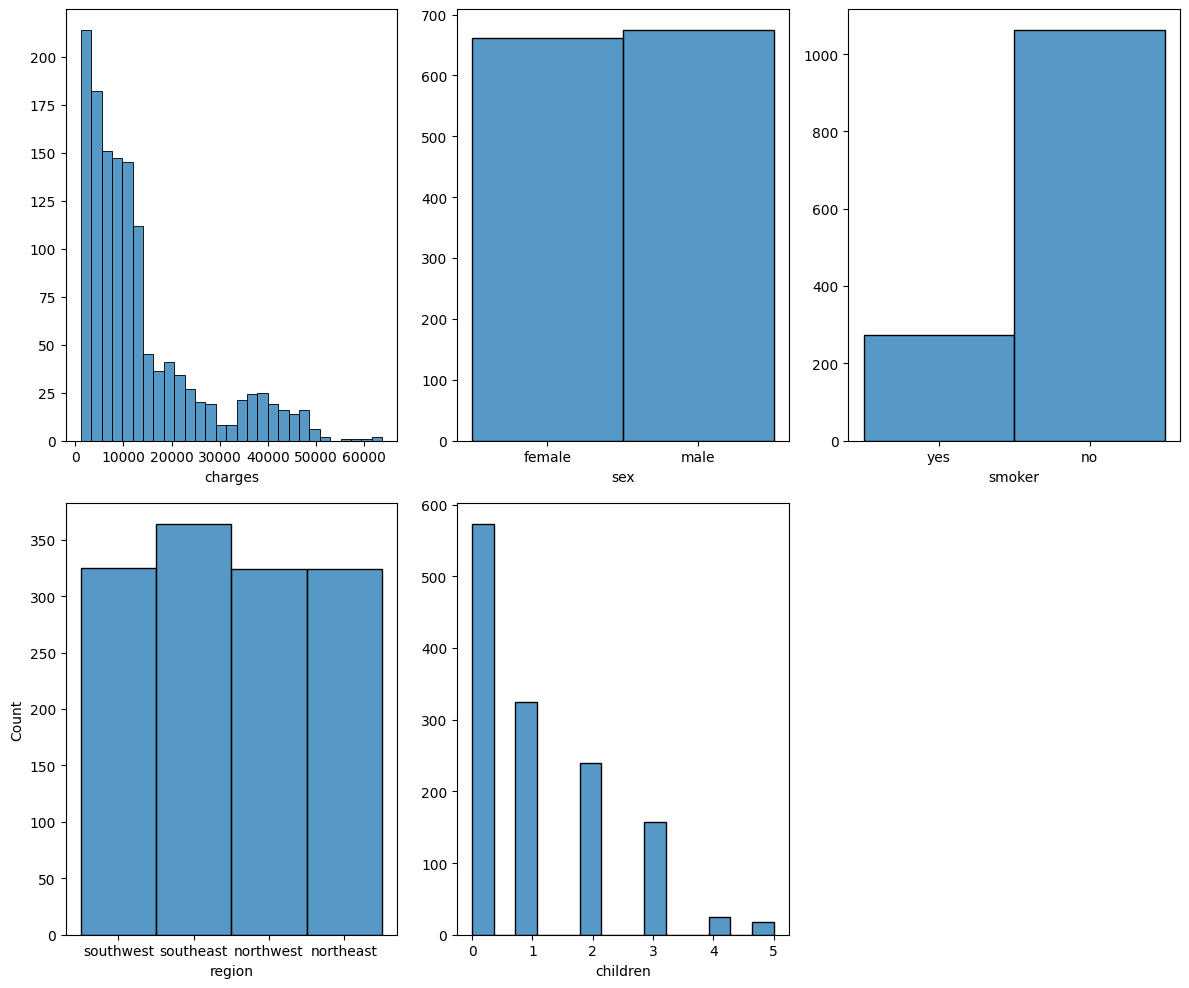

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 3, figsize=(12, 10))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=ds, x="charges").set(ylabel=None)
sns.histplot(ax=axis[0, 1], data=ds, x="sex").set(ylabel=None)
sns.histplot(ax=axis[0, 2], data=ds, x="smoker").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=ds, x="region")
sns.histplot(ax=axis[1, 1], data=ds, x="children").set(ylabel=None)


# Eliminar el subplot vacío que sobra (axis[3, 2])
fig.delaxes(axis[1, 2])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

La mayor parte de los datos de charges están por debajo de 15.000, pero tanbien cuenta con resultados entre 15.000-50.000, por lo que los resultados son muy dispersos.

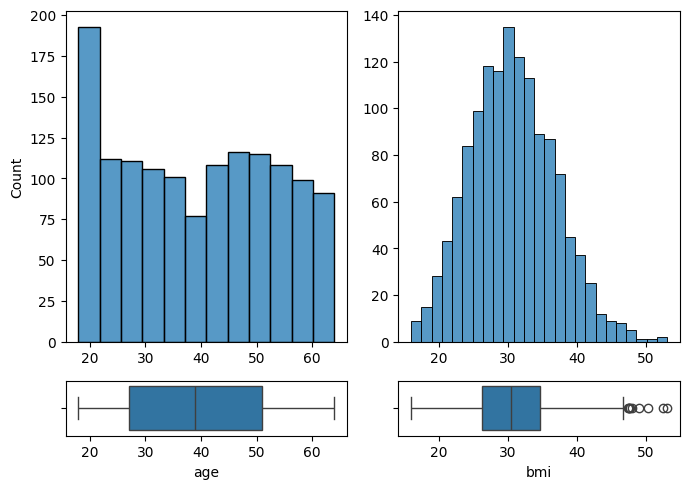

In [5]:
fig, axis = plt.subplots(2, 2, figsize = (7, 5), gridspec_kw={'height_ratios': [6, 1]})

# Variables numéricas: 'age', 'bmi'

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = ds, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = ds, x = "age")
sns.histplot(ax = axis[0, 1], data = ds, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = ds, x = "bmi")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


En BMI, se aprecian valores atípicos por encima de 46, son 16 valores, pero tras representar histograma y ver los valores >47 y su dispersion en el valor de charges, decido eliminarlos.
En cuanto a la edad, la mayor parte de los datos están entre 27-50 años, con media aprox de 39, pero existe un pico de datos en torno a los 20 años, con un 25% de valores por debajo de 27.Pero no pueden considerarse outliers.

In [11]:
outlier_bmi= ds[ds['bmi']>46]
outlier_bmi

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
438,52,female,46.75,5,no,southeast,12592.53450
454,32,male,46.53,2,no,southeast,4686.38870
543,54,female,47.41,0,yes,southeast,63770.42801
547,54,female,46.70,2,no,southwest,11538.42100
549,43,female,46.20,0,yes,southeast,45863.20500
660,37,male,46.53,3,no,southeast,6435.62370
847,23,male,50.38,1,no,southeast,2438.05520


<Axes: xlabel='bmi', ylabel='Count'>

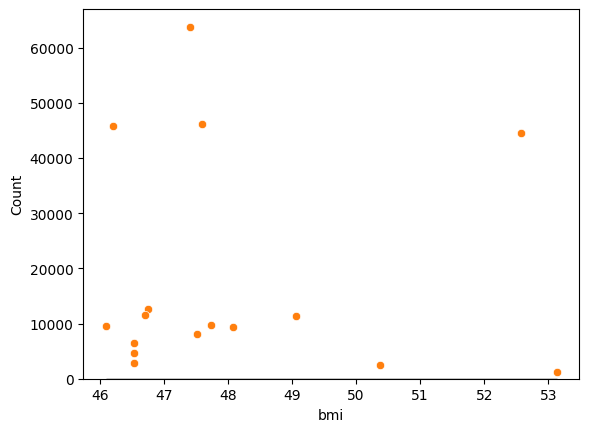

In [14]:
sns.histplot(data=outlier_bmi, x="bmi")
sns.scatterplot(data=outlier_bmi, x="bmi", y="charges")

In [23]:
ds=ds[ds['bmi']<47]

Análisis de variables multivariante.

Análisis numérico-numérico

La distribucion de la edad es mas o menos uniforme y no se aprecian valores atípicos.
El BMI si tiene outliers, que seguramente haya que eliminar.

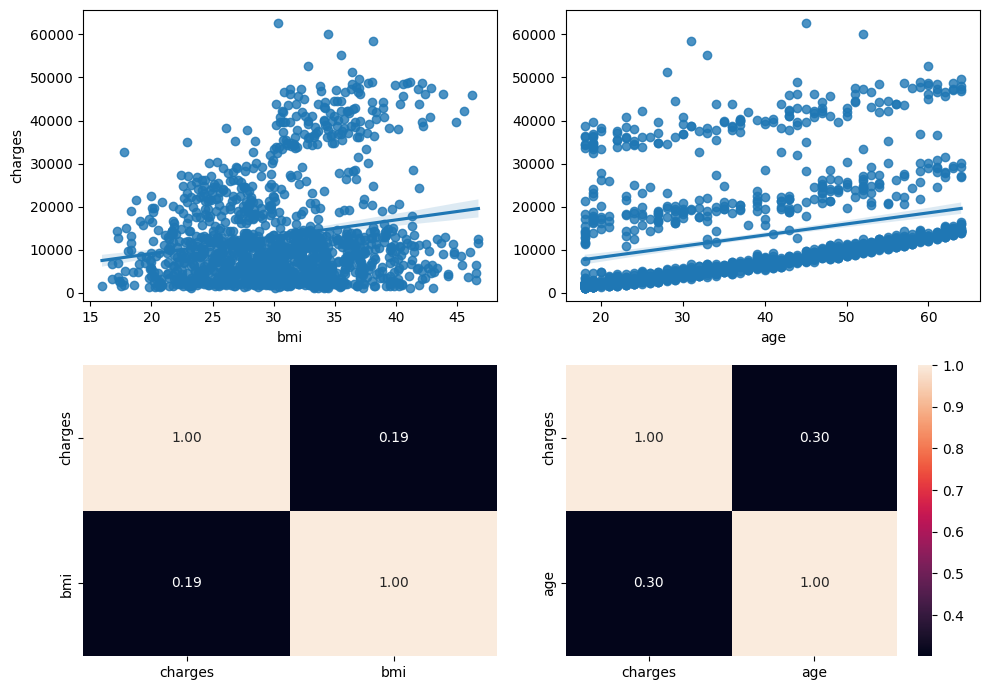

In [25]:
# bmi y bmi con charges
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "bmi", y = "charges")
sns.heatmap(ds[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(ds[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Analisis categórico - categórico

'sex', 'smoker', 'region', 'children' 

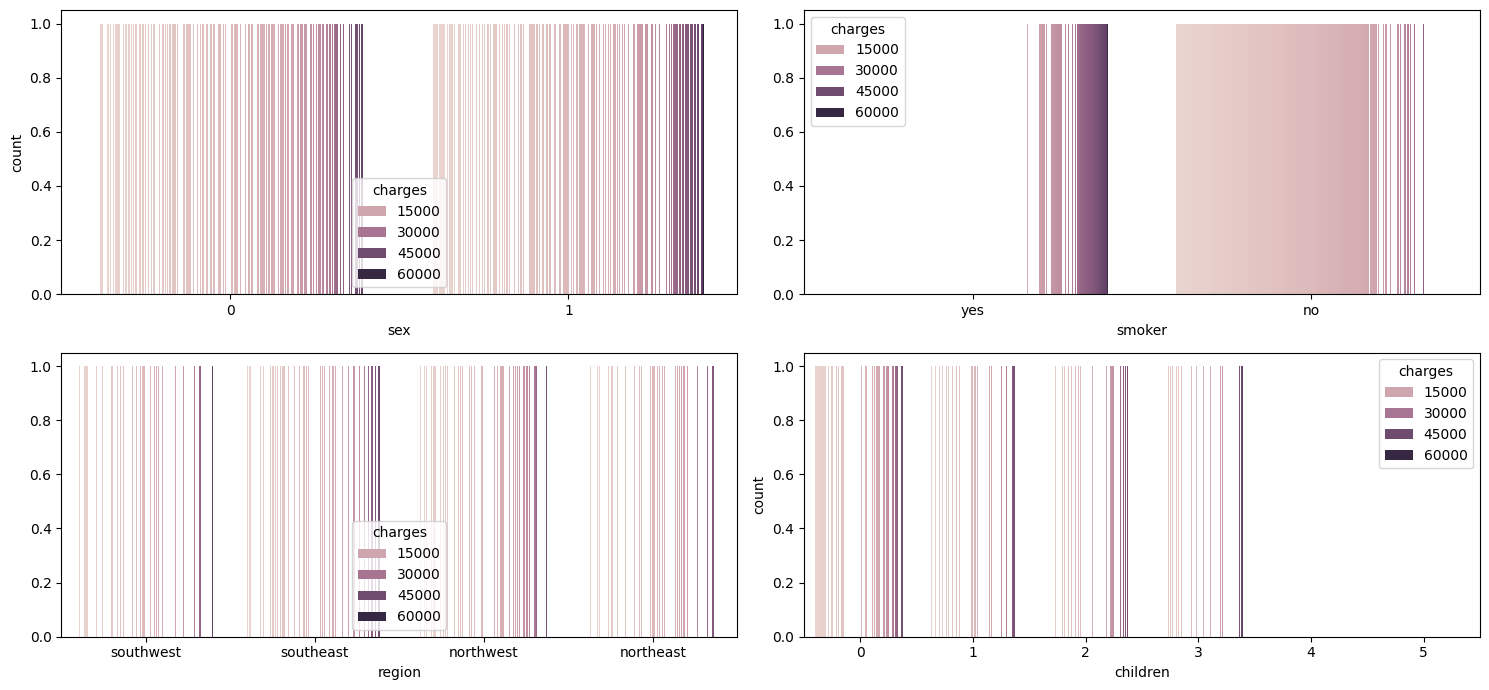

In [33]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = ds, x = "sex", hue = "charges")
sns.countplot(ax = axis[0, 1], data = ds, x = "smoker", hue = "charges").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = ds, x = "region", hue = "charges").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = ds, x = "children", hue = "charges")

plt.tight_layout()
plt.show()

No se aprecian tendencisas claras por lo que mejor tratar de verlo en diagramas de dispersion y combinando clases.

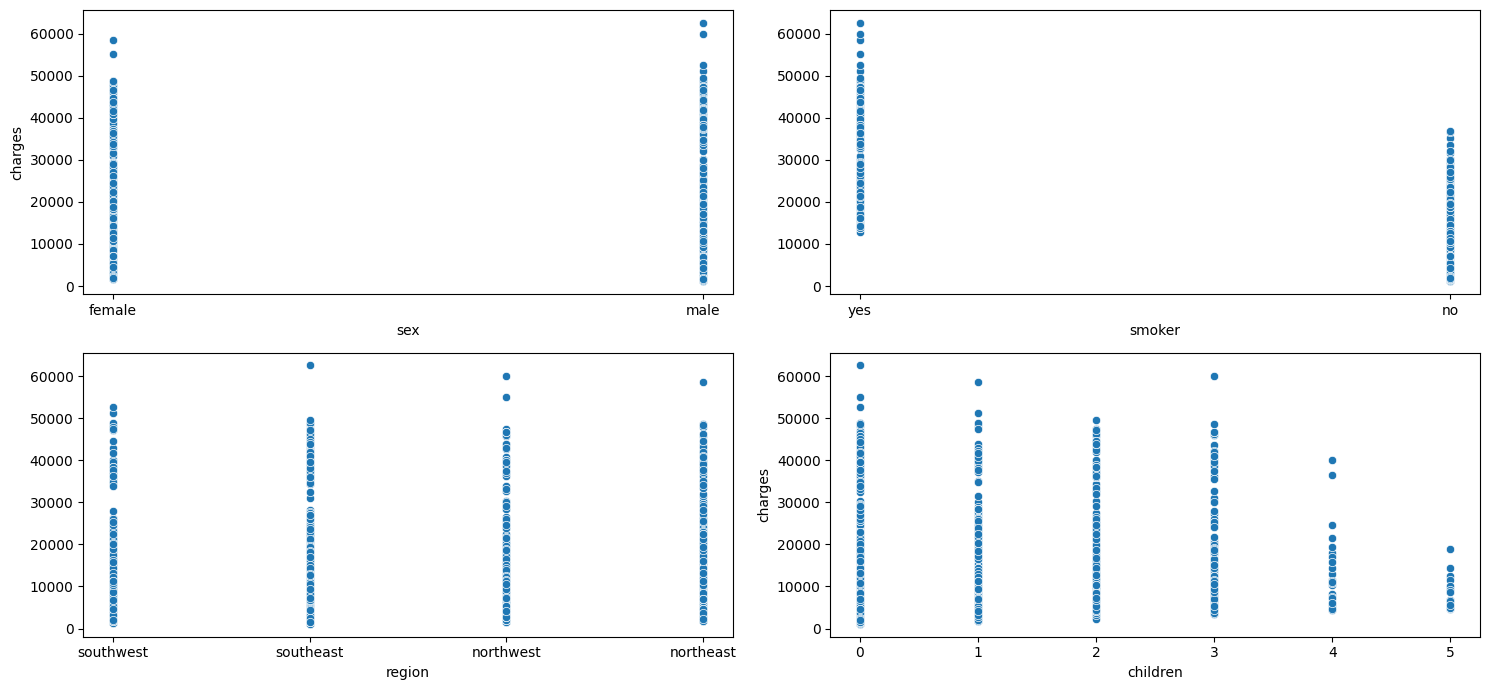

In [29]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.scatterplot(ax = axis[0, 0], data = ds, x = "sex", y= "charges")
sns.scatterplot(ax = axis[0, 1], data = ds, x = "smoker", y= "charges").set(ylabel = None)
sns.scatterplot(ax = axis[1, 0], data = ds, x = "region", y= "charges").set(ylabel = None)
sns.scatterplot(ax = axis[1, 1], data = ds, x = "children", y= "charges")

plt.tight_layout()
plt.show()

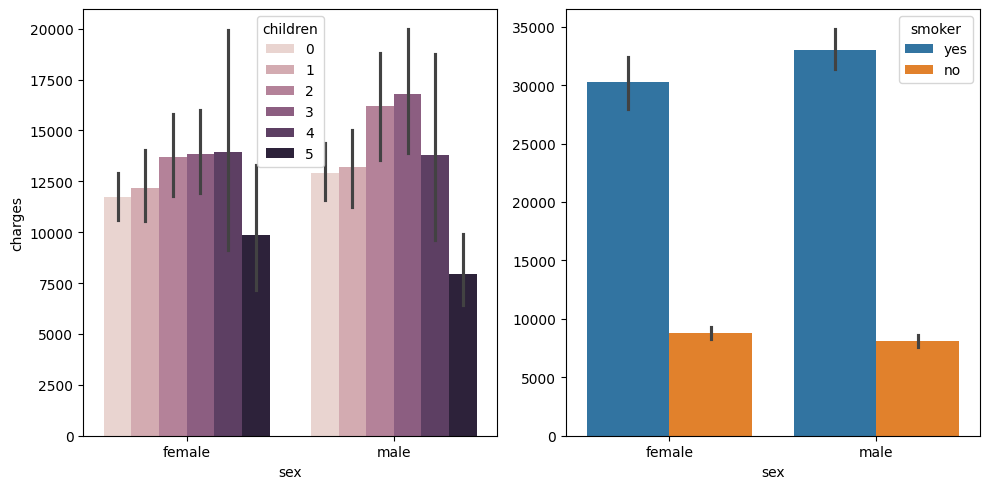

In [31]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = ds, x = "sex", y = "charges", hue = "children")
sns.barplot(ax = axis[1], data = ds, x = "sex", y = "charges", hue = "smoker").set(ylabel = None)

plt.tight_layout()

plt.show()

Análisis de correlaciones

Categóricos-cagegóricos:

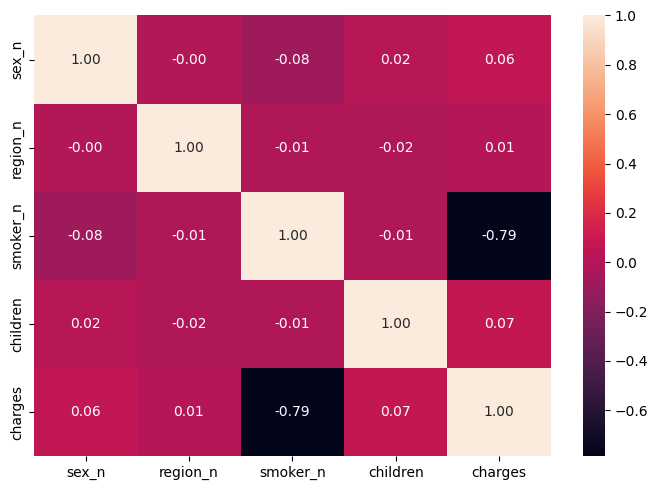

In [38]:
ds["sex_n"] = pd.factorize(ds["sex"])[0]
ds["smoker_n"] = pd.factorize(ds["smoker"])[0]
ds["region_n"] = pd.factorize(ds["region"])[0]

fig, axis = plt.subplots(figsize = (7, 5))

sns.heatmap(ds[["sex_n", "region_n", "smoker_n", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Se aprecia una fuerte relación entre ser fumador y la variable objetivo. Con el resto de varibles categóricas la corelación es despreciable

Análisis numérico-categórico (completo)

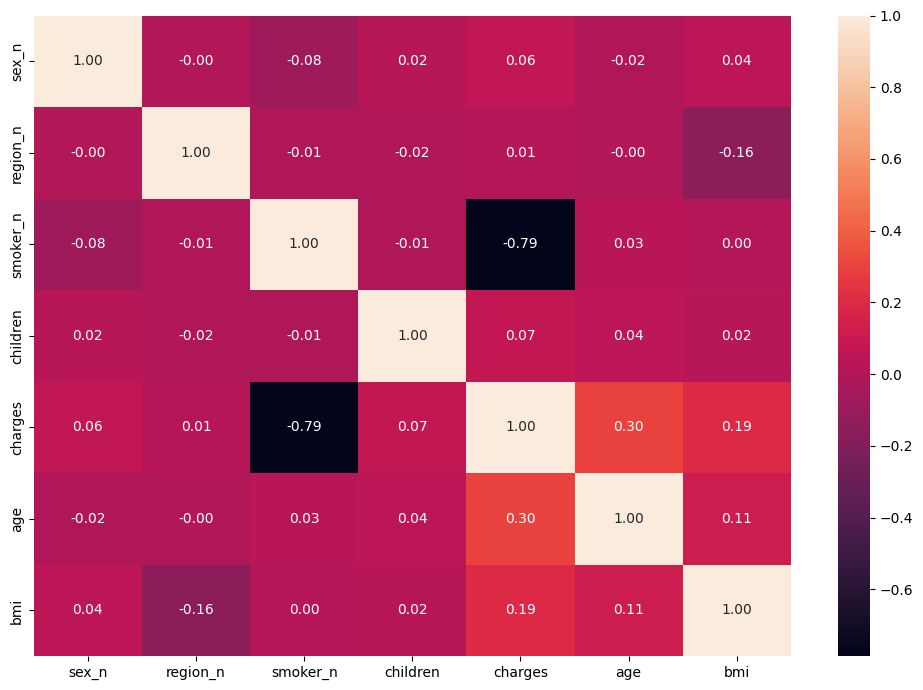

In [39]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(ds[["sex_n", "region_n", "smoker_n", "children", "charges", "age", "bmi" ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

atributos con mayores correlaciones : edad, fumador, y más leve bmi

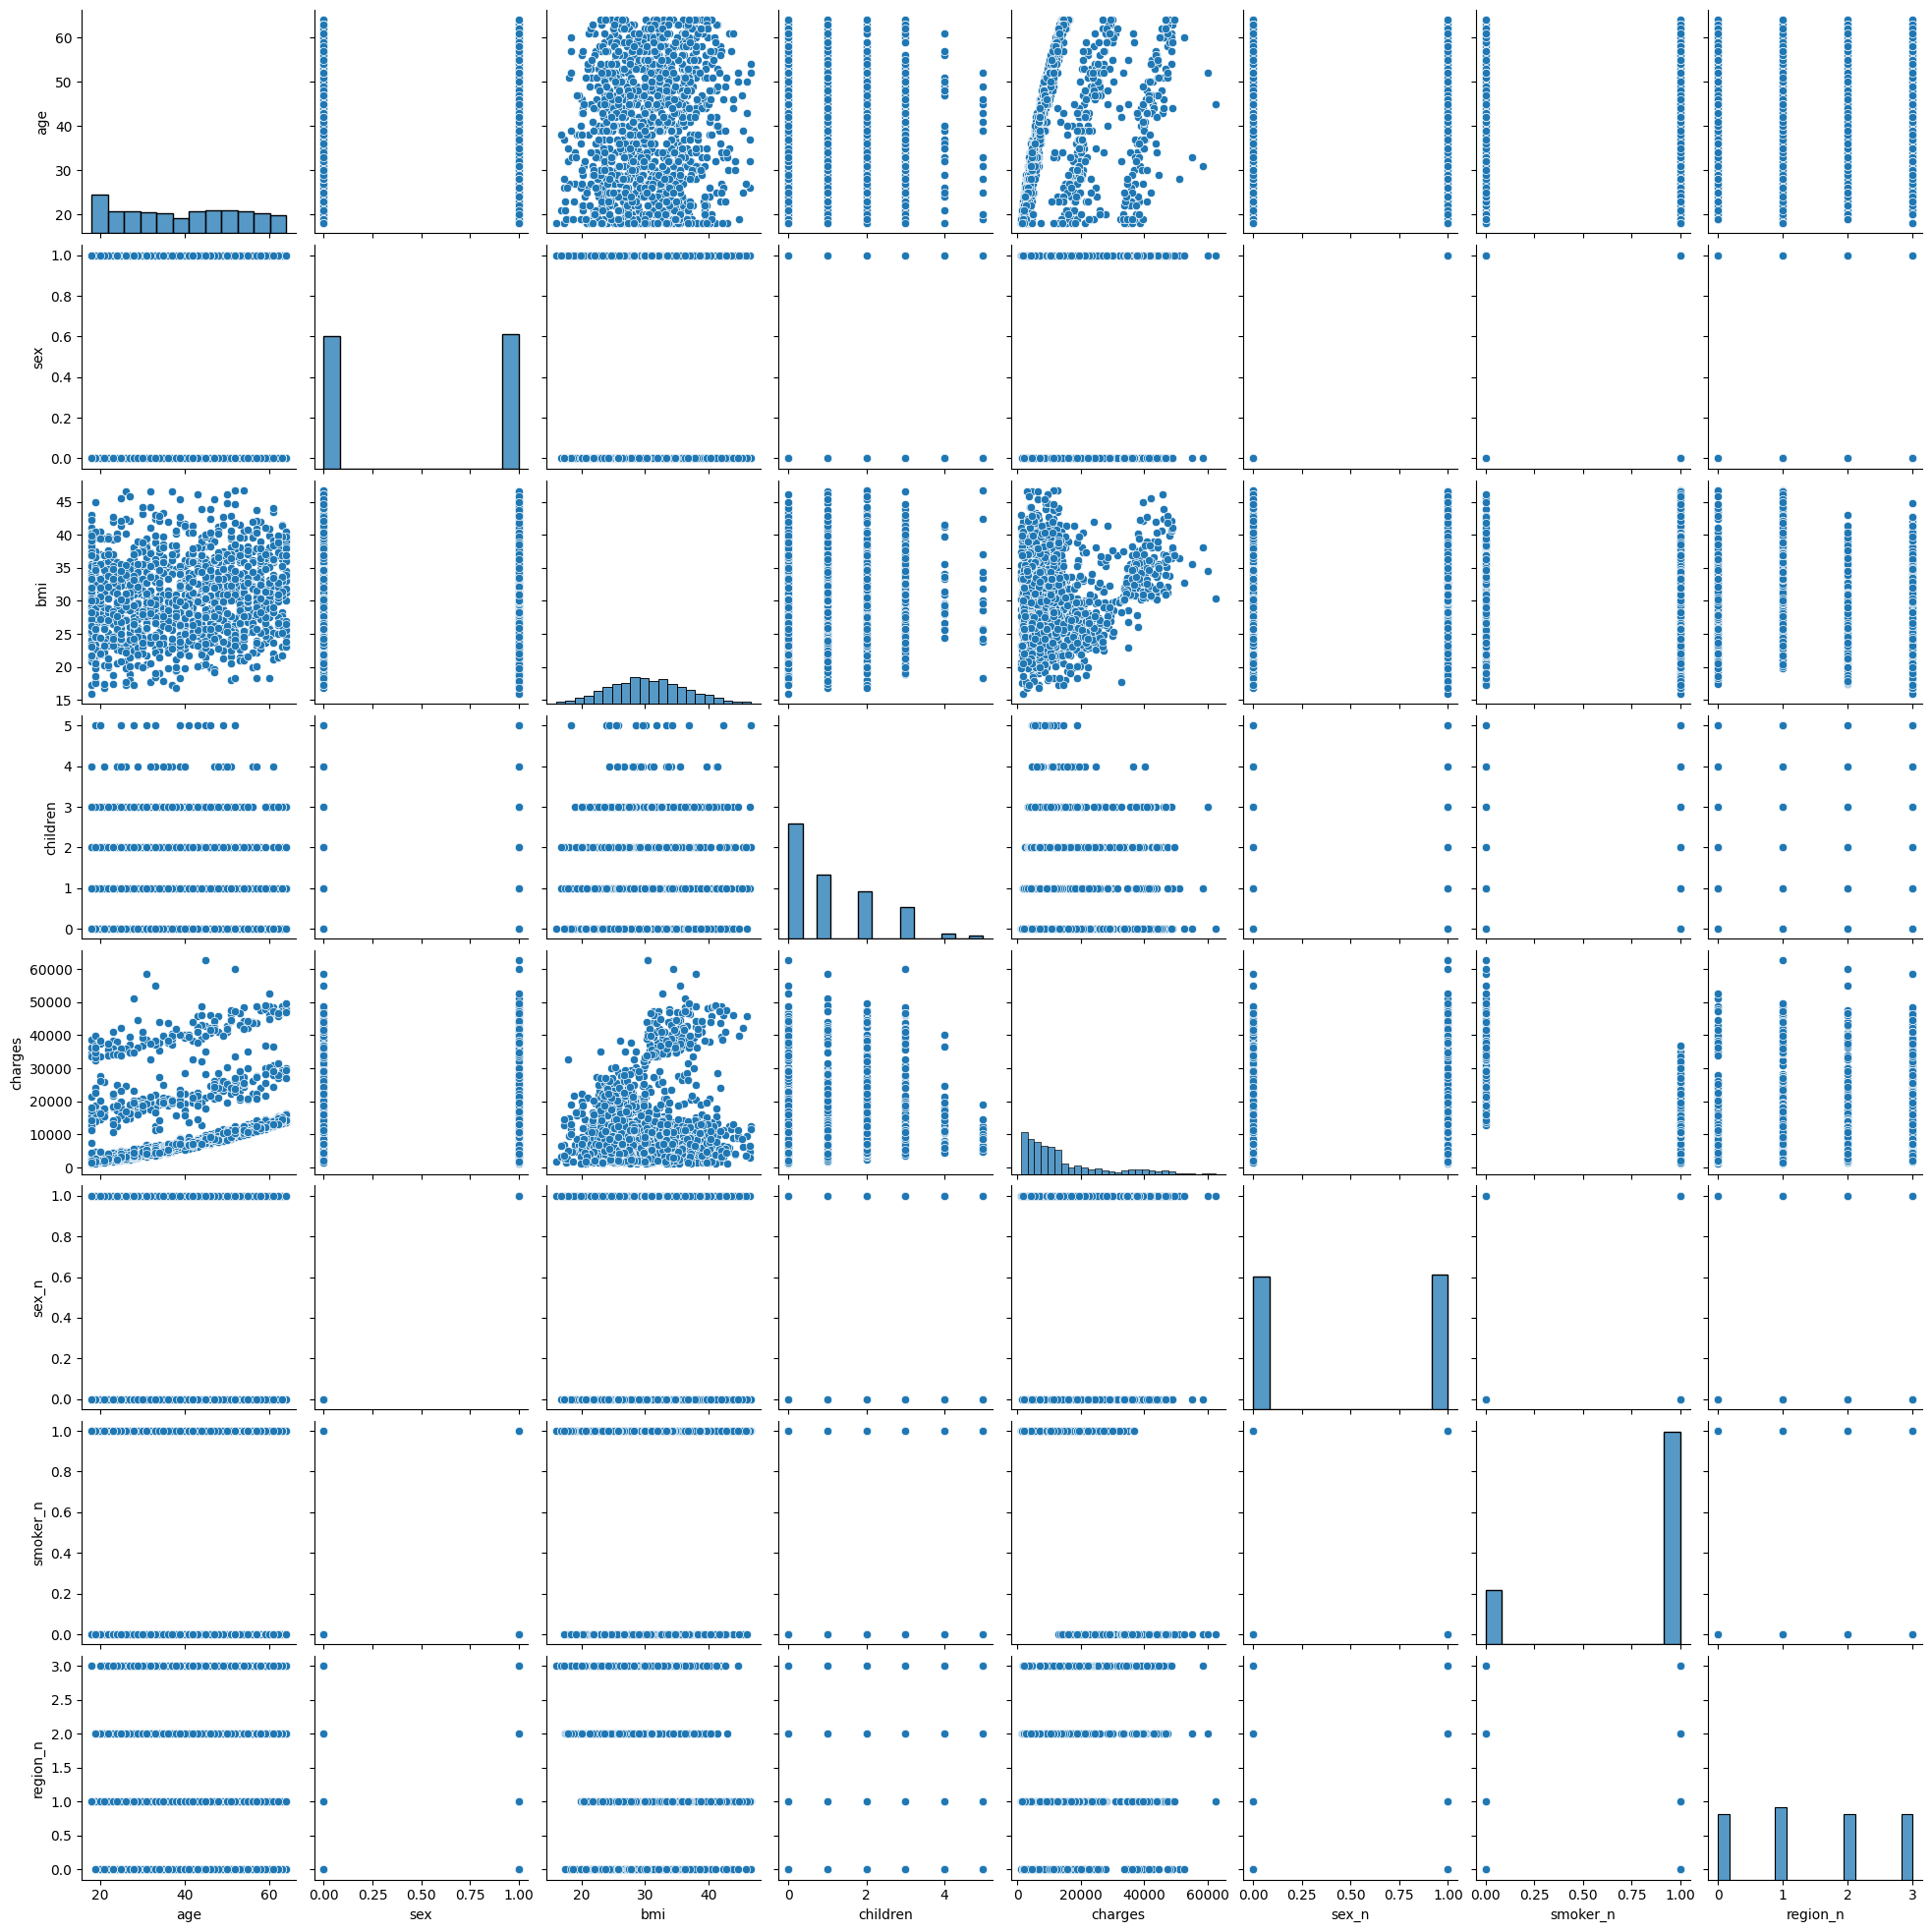

In [40]:
sns.pairplot(data = ds)

In [41]:
# Análisis de outliers

ds.describe()

,age,sex,bmi,children,charges,sex_n,smoker_n,region_n
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,0.503765,30.537308,1.097139,13221.047810,0.503765,0.795934,1.486446
std,14.042170,0.500174,5.922176,1.208008,11997.547468,0.500174,0.403169,1.106859
min,18.000000,0.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.220000,0.000000,4744.325050,0.000000,1.000000,1.000000
50%,39.000000,1.000000,30.300000,1.000000,9369.615750,1.000000,1.000000,1.000000
75%,51.000000,1.000000,34.488750,2.000000,16604.302645,1.000000,1.000000,2.000000
max,64.000000,1.000000,46.750000,5.000000,62592.873090,1.000000,1.000000,3.000000


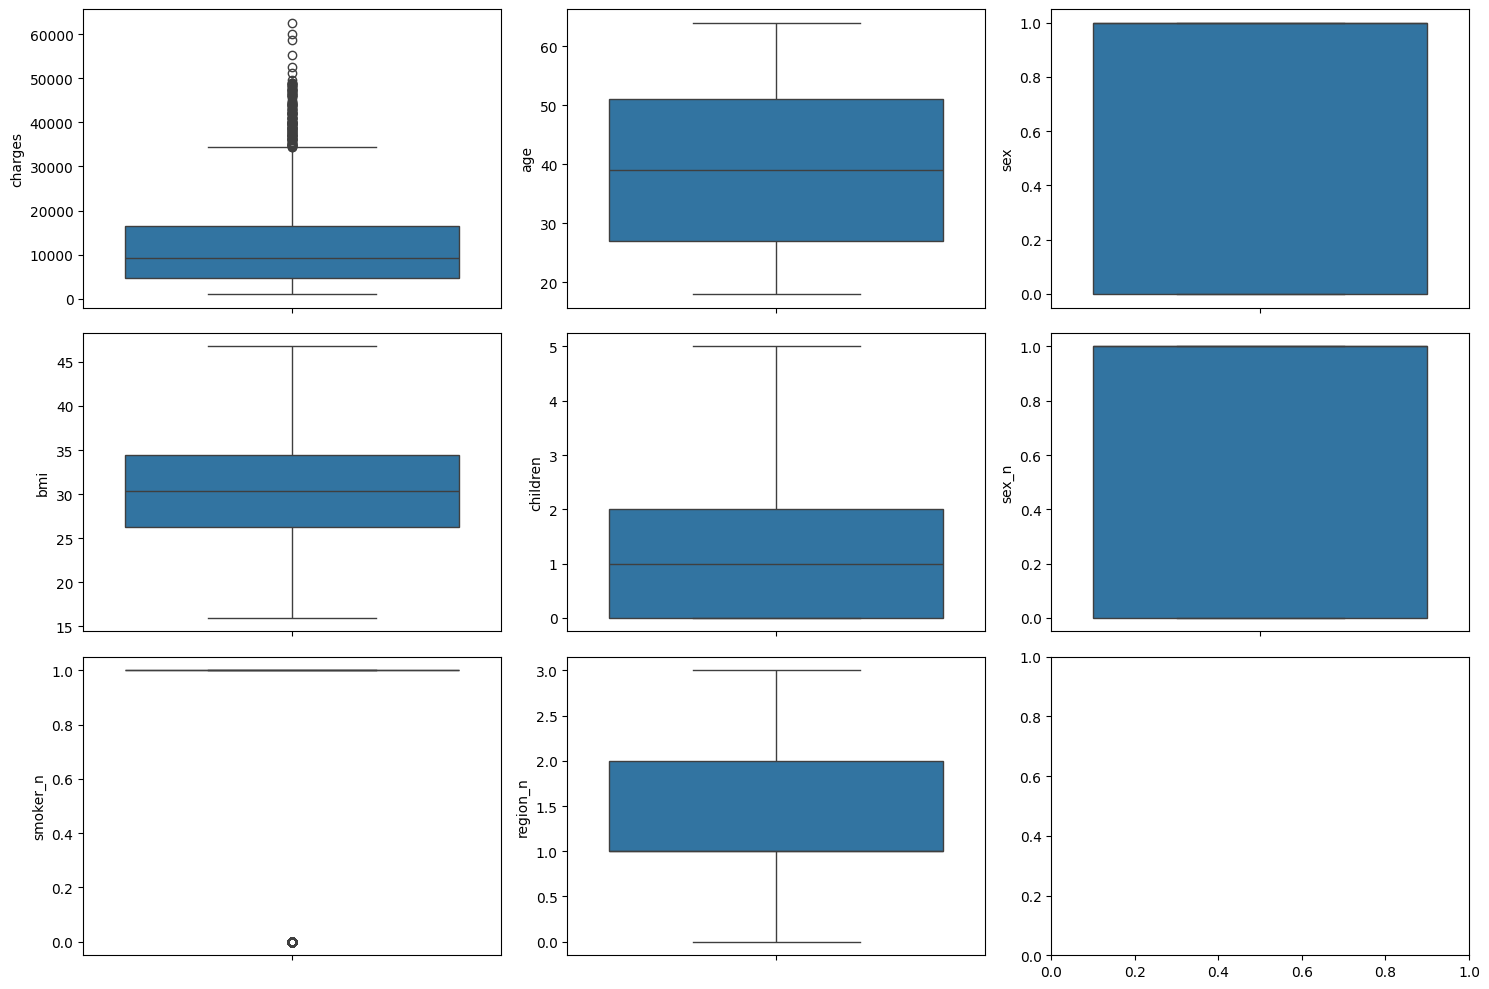

In [43]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = ds, y = "charges")
sns.boxplot(ax = axis[0, 1], data = ds, y = "age")
sns.boxplot(ax = axis[0, 2], data = ds, y = "sex")
sns.boxplot(ax = axis[1, 0], data = ds, y = "bmi")
sns.boxplot(ax = axis[1, 1], data = ds, y = "children")
sns.boxplot(ax = axis[1, 2], data = ds, y = "sex_n")
sns.boxplot(ax = axis[2, 0], data = ds, y = "smoker_n")
sns.boxplot(ax = axis[2, 1], data = ds, y = "region_n")

plt.tight_layout()

plt.show()


Si bien charges es una variable objetivo, se observan valores atipicos, por encima de 50.000 que pueden tener explcación con otros factores que aquí no están incuidos.No se trata de gente especialmente mayor, con bmi alto o con muchos hijos, no responde a estos patrones.  Al ordenarlos, se aprecia que en 5 registros hay una caida de 10.000€ que no se matiene en el resto. Creo que esto puede distornionar el resultado del algoritmo, porque daría unos precios más altos de lo esperable, si no se tienen en cuenta esos valores. 
Sólo se apreció relación en los fumadores, la edad y de forma muy leve el bmi, por lo que eliminaría el resto de columnas.

In [53]:
ds.sort_values("charges", ascending=False).head(20)

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
1300,45,1,30.360,0,yes,southeast,62592.87309,1,0,1
1230,52,1,34.485,3,yes,northwest,60021.39897,1,0,2
577,31,0,38.095,1,yes,northeast,58571.07448,0,0,3
819,33,0,35.530,0,yes,northwest,55135.40209,0,0,2
1146,60,1,32.800,0,yes,southwest,52590.82939,1,0,0
34,28,1,36.400,1,yes,southwest,51194.55914,1,0,0
1241,64,1,36.960,2,yes,southeast,49577.66240,1,0,1
1062,59,1,41.140,1,yes,southeast,48970.24760,1,0,1
488,44,0,38.060,0,yes,southeast,48885.13561,0,0,1
175,63,0,37.700,0,yes,southwest,48824.45000,0,0,0


In [49]:
filtro_ds= ds[ds['smoker'] == 'yes']
filtro_ds.describe()

,age,sex,bmi,children,charges,sex_n,smoker_n,region_n
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.0,271.000000
mean,38.523985,0.583026,30.503782,1.114391,31835.343855,0.583026,0.0,1.498155
std,13.932057,0.493971,6.038645,1.160226,11384.541798,0.493971,0.0,1.081407
min,18.000000,0.000000,17.195000,0.000000,12829.455100,0.000000,0.0,0.000000
25%,27.000000,0.000000,26.050000,0.000000,20759.808425,0.000000,0.0,1.000000
50%,38.000000,1.000000,30.360000,1.000000,34303.167200,1.000000,0.0,1.000000
75%,49.000000,1.000000,35.025000,2.000000,40936.857450,1.000000,0.0,2.000000
max,64.000000,1.000000,46.200000,5.000000,62592.873090,1.000000,0.0,3.000000


In [50]:
ds.describe()

,age,sex,bmi,children,charges,sex_n,smoker_n,region_n
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,0.503765,30.537308,1.097139,13221.047810,0.503765,0.795934,1.486446
std,14.042170,0.500174,5.922176,1.208008,11997.547468,0.500174,0.403169,1.106859
min,18.000000,0.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.220000,0.000000,4744.325050,0.000000,1.000000,1.000000
50%,39.000000,1.000000,30.300000,1.000000,9369.615750,1.000000,1.000000,1.000000
75%,51.000000,1.000000,34.488750,2.000000,16604.302645,1.000000,1.000000,2.000000
max,64.000000,1.000000,46.750000,5.000000,62592.873090,1.000000,1.000000,3.000000


In [52]:
ds[ds['charges']== (ds['charges'].max())]

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
1300,45,1,30.36,0,yes,southeast,62592.87309,1,0,1


In [ ]:
ds['smoker'].unique()  # 


smoker
no     1057
yes     271
Name: count, dtype: int64


In [ ]:
fare_iqr = fare_stats["75%"] - fare_stats["25%"]
upper_limit = fare_stats["75%"] + 1.5 * fare_iqr
lower_limit = fare_stats["25%"] - 1.5 * fare_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(fare_iqr, 2)}")